<a href="https://colab.research.google.com/github/Luke-Schreiber/data-analytics-projects/blob/main/Statistics_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Inquiry

How are β0, β1 and σ^2 of a linear model are affected by changing:

*   Sample size (n)
*   Inclusion of outliers
*   Degree of outlier-ness

# Project Plan

Generate data and write functions to introduce different sample sizes and outliers.



## Import Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
import statsmodels.api as sm
np.random.seed(666)

## Setting up utility functions

In [2]:
def generate_bivariate(b1, b0, std, n):
  '''
  Function to generate bivariate data with a normally 
  distrubuted epsilon
    
    Args:
      b1: Slope
      b0: Intercept
      std: Standard Deviation
      n: Number of Generated Samples
    
    Returns:
      x: x-values for the generated data
      y: y-values for the generated data
  '''
  # Introduce error and add to y.
  x = np.random.uniform(0,n,n)
  error = np.random.normal(size=n, scale=std)
  y = b1*x + b0 + error
  return x,y

In [3]:
def introduce_outlier(x,y, IQRScaler=1.5, high=True):
  '''
  Function to introduce outliers by selecting the 3rd quartile 
  in x and y, denoted xi and yi and adding an outlier, at point 
  (xi, yi+(1.5-3)Iqr) get 3rd quartile of x

    Args:
      x: x-data
      y: y-data
      IQRScaler: This must be >1.5 to be an outlier
      high: Do you want a outlier above or below the line

    Returns:
      x: x-values for the data with the outlier
      y: y-values for the data with the outlier

  '''
  xThirdQuartile = np.quantile(x, [0.75])
  yIQRQuartiles = np.quantile(y, [0.25,0.75])
  yIQR = yIQRQuartiles[1] - yIQRQuartiles[0]

  yOutlier = yIQRQuartiles[1] + (yIQR * IQRScaler) if high else yIQRQuartiles[0] - (yIQR * IQRScaler)

  #add this new term to the data set
  xnew = np.append(x, xThirdQuartile)
  ynew = np.append(y,yOutlier)

  return xnew, ynew

In [4]:
def get_regression_parameters(x,y):
    '''
    Create a linear model for the data and 
    return the regression parameters

      Returns:
        b0: Intercept
        b1: Slope
        std: Standard Deviation
    '''
    x = sm.add_constant(x)

    # Create model, set b0, b1, and std.
    model = sm.OLS(y,x)
    results = model.fit()
    b0 = results.params[0]
    b1 = results.params[1]
    std = np.sqrt(results.scale)

    return b0, b1, std

In [5]:
def generative_outlier_comparision(b1, b0, std, n, IQRScaler=1.5, high=True, plot=True):
  '''
  Main Test Function
  '''
  if(plot):
    fig, ax = plt.subplots()

  # Generate the original data
  x, y = generate_bivariate(b1, b0, std, n)

  # Plot the original data and regression line
  if(plot):
    ax.scatter(x, y, label='Data', color='blue')

  b0_hat, b1_hat, std_hat = get_regression_parameters(x, y)

  if(plot):
    ax.plot(x, b0_hat + b1_hat*x, color='green', label='Pre-outlier Regression')

  # Introduce an outlier
  x_out, y_out = introduce_outlier(x, y, IQRScaler=IQRScaler, high=high)
  outlier_idx = np.where(y_out == np.max(y_out))[0][0] if high else np.where(y_out == np.min(y_out))[0][0]

  # Plot the outlier data point in purple
  if(plot):
    ax.scatter(x_out[outlier_idx], y_out[outlier_idx], color='orange', label='Outlier')

  # Plot the data and regression line after introducing the outlier
  b0_hat_out, b1_hat_out, std_hat_out = get_regression_parameters(x_out, y_out)

  if(plot):
    ax.plot(x_out, b0_hat_out + b1_hat_out*x_out, color='red', label='Post-outlier Regression')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    ax.set_title("Pre and Post Outlier Insertion Visualization")
    plt.show()
    print(f'Beta_0_Hat Pre-Outlier:{b0_hat:0.2f}, Post-Outlier:{b0_hat_out:0.2f}, Difference:{np.abs(b0_hat_out-b0_hat):0.2f}')
    print(f'Beta_1_Hat Pre-Outlier:{b1_hat:0.2f}, Post-Outlier:{b1_hat_out:0.2f}, Difference:{np.abs(b1_hat_out-b1_hat):0.2f}')
    print(f'Std_hat Pre-Outlier:{std_hat:0.2f}, Post-Outlier:{std_hat_out:0.2f}, Difference:{np.abs(std_hat_out-std_hat):0.2f}')
  return  {
            "b0_hat":b0_hat,
            "b1_hat":b1_hat,
            "std_hat":std_hat,
            "b0_hat_outlier":b0_hat_out,
            "b1_hat_outlier":b1_hat_out,
            "std_hat_outlier":std_hat_out,
          }

In [6]:
def outlier_comparision(x,y, IQRScaler=1.5, high=True, plot=True):
  '''
  Main Test Function
  '''
  if(plot):
    fig, ax = plt.subplots()

  # Plot the original data and regression line
  if(plot):
    ax.scatter(x, y, label='Data', color='blue')

  b0_hat, b1_hat, std_hat = get_regression_parameters(x, y)

  if(plot):
    ax.plot(x, b0_hat + b1_hat*x, color='green', label='Pre-outlier Regression')

  # Introduce an outlier
  x_out, y_out = introduce_outlier(x, y, IQRScaler=IQRScaler, high=high)
  outlier_idx = np.where(y_out == np.max(y_out))[0][0] if high else np.where(y_out == np.min(y_out))[0][0]

  # Plot the outlier data point in purple
  if(plot):
    ax.scatter(x_out[outlier_idx], y_out[outlier_idx], color='orange', label='Outlier')

  # Plot the data and regression line after introducing the outlier
  b0_hat_out, b1_hat_out, std_hat_out = get_regression_parameters(x_out, y_out)

  if(plot):
    ax.plot(x_out, b0_hat_out + b1_hat_out*x_out, color='red', label='Post-outlier Regression')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    ax.set_title("Pre and Post Outlier Insertion Visualization")
    plt.show()
    print(f'Beta_0_Hat Pre-Outlier:{b0_hat:0.2f}, Post-Outlier:{b0_hat_out:0.2f}, Difference:{np.abs(b0_hat_out-b0_hat):0.2f}')
    print(f'Beta_1_Hat Pre-Outlier:{b1_hat:0.2f}, Post-Outlier:{b1_hat_out:0.2f}, Difference:{np.abs(b1_hat_out-b1_hat):0.2f}')
    print(f'Std_hat Pre-Outlier:{std_hat:0.2f}, Post-Outlier:{std_hat_out:0.2f}, Difference:{np.abs(std_hat_out-std_hat):0.2f}')
    
  return  {
            "b0_hat":b0_hat,
            "b1_hat":b1_hat,
            "std_hat":std_hat,
            "b0_hat_outlier":b0_hat_out,
            "b1_hat_outlier":b1_hat_out,
            "std_hat_outlier":std_hat_out,
          }

##Outlier Comparision Test

In [7]:
b1 = 300
b0 = 5000
std = 100
n = 30
b1ChangeArr = []
b0ChangeArr = []
stdChangeArr = []
b1ChangeArr50 = []
b0ChangeArr50 = []
stdChangeArr50 = []
b1ChangeArr100 = []
b0ChangeArr100 = []
stdChangeArr100 = []
IqrArr = []

#generate data of size 30
x,y = generate_bivariate(b1,b0,std,n)
for trial in range(1000):
  params = generative_outlier_comparision(b1,b0,std,n,1.5 + 0.002*trial, True, False)
  
  #calculate proportional change change in B0, B1, and s
  b1ChangeArr.append((params["b1_hat_outlier"] - params["b1_hat"])/params["b1_hat"])
  b0ChangeArr.append((params["b0_hat_outlier"] - params["b0_hat"])/params["b0_hat"])
  stdChangeArr.append((params["std_hat_outlier"] - params["std_hat"])/params["std_hat"])
  IqrArr.append(1.5 + 0.002*trial)


#generate data of size 50
n=50
x,y = generate_bivariate(b1,b0,std,n)
for trial in range(1000):
  params = generative_outlier_comparision(b1,b0,std,n,1.5 + 0.002*trial, True, False)
  
  #calculate proportional change change in B0, B1, and s
  b1ChangeArr50.append((params["b1_hat_outlier"] - params["b1_hat"])/params["b1_hat"])
  b0ChangeArr50.append((params["b0_hat_outlier"] - params["b0_hat"])/params["b0_hat"])
  stdChangeArr50.append((params["std_hat_outlier"] - params["std_hat"])/params["std_hat"])

#generate data of size 100
n=100
x,y = generate_bivariate(b1,b0,std,n)
for trial in range(1000):
  params = generative_outlier_comparision(b1,b0,std,n,1.5 + 0.002*trial, True, False)
  
  #calculate proportional change change in B0, B1, and s
  b1ChangeArr100.append((params["b1_hat_outlier"] - params["b1_hat"])/params["b1_hat"])
  b0ChangeArr100.append((params["b0_hat_outlier"] - params["b0_hat"])/params["b0_hat"])
  stdChangeArr100.append((params["std_hat_outlier"] - params["std_hat"])/params["std_hat"])

#convert to np arrays for graphing
b1ChangeArr = np.array(b1ChangeArr)
b0ChangeArr = np.array(b0ChangeArr)
stdChangeArr = np.array(stdChangeArr)
b1ChangeArr50 = np.array(b1ChangeArr50)
b0ChangeArr50 = np.array(b0ChangeArr50)
stdChangeArr50 = np.array(stdChangeArr50)
b1ChangeArr100 = np.array(b1ChangeArr100)
b0ChangeArr100 = np.array(b0ChangeArr100)
stdChangeArr100 = np.array(stdChangeArr100)
IqrArr = np.array(IqrArr)

## Graph results


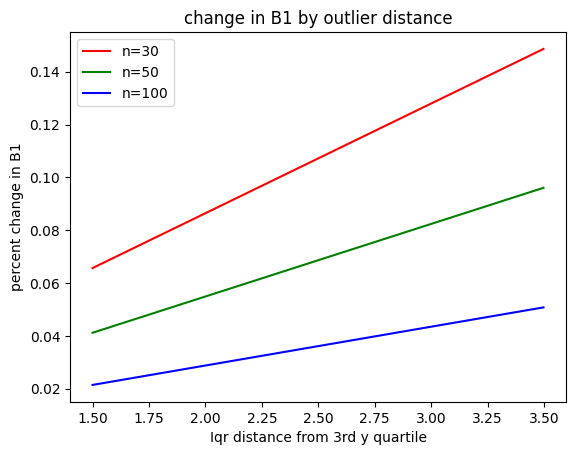

In [8]:
#make some nice looking graphs of those 3 terms by IQR 
#distance from y^ graph B1

b0,b1,std = get_regression_parameters(IqrArr,b1ChangeArr)
fig, ax = plt.subplots()
ax.plot(IqrArr, b0.item() + b1.item()*IqrArr, color = "red")
b0,b1,std = get_regression_parameters(IqrArr,b1ChangeArr50)
ax.plot(IqrArr, b0.item() + b1.item()*IqrArr, color = "green")
b0,b1,std = get_regression_parameters(IqrArr,b1ChangeArr100)
ax.plot(IqrArr, b0.item() + b1.item()*IqrArr, color = "blue")
ax.set_title("change in B1 by outlier distance")
ax.set_xlabel("Iqr distance from 3rd y quartile")
ax.set_ylabel("percent change in B1")
ax.legend(["n=30", "n=50", "n=100"])


Text(0.5, 1.0, 'change in mean vs sample size')

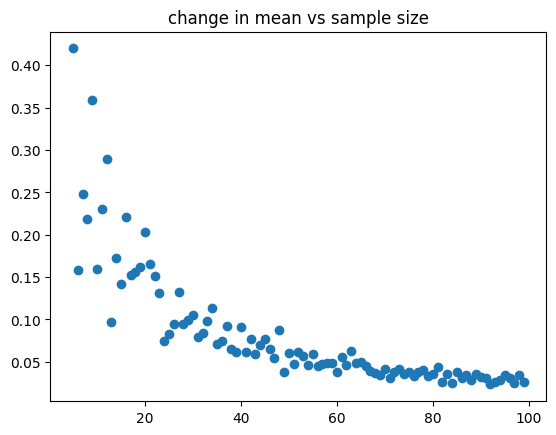

In [9]:
#change in Y bar by outlier
changeinmean =[] 
indexes = []
for trial in range(5,100):
  x,y = generate_bivariate(b1,b0,std,trial)
  y = np.array(y)
  meaninitial = np.mean(y)
  yIQRQuartiles = np.quantile(y, [0.25,0.75])
  yIQR = yIQRQuartiles[1] - yIQRQuartiles[0]
  yOutlier = yIQRQuartiles[1] + (yIQR * 2.5)
  ynew = np.append(y,yOutlier)
  meanfinal = np.mean(ynew)
  change = (meanfinal-meaninitial)/meaninitial
  changeinmean.append(change)
  indexes.append(trial)

# scatter plot
fig,ax=plt.subplots()
ax.scatter(indexes,changeinmean)
ax.set_title("change in mean vs sample size")





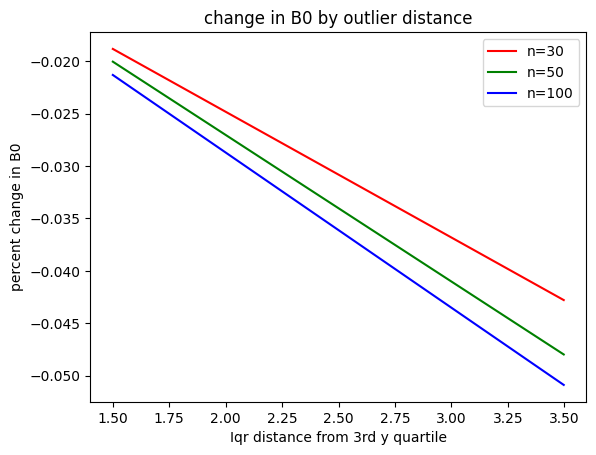

In [10]:
#graph B0
b0,b1,std = get_regression_parameters(IqrArr,b0ChangeArr)
fig, ax = plt.subplots()

ax.plot(IqrArr, b0.item() + b1.item()*IqrArr, color = "red")
b0,b1,std = get_regression_parameters(IqrArr,b0ChangeArr50)
ax.plot(IqrArr, b0.item() + b1.item()*IqrArr, color = "green")
b0,b1,std = get_regression_parameters(IqrArr,b0ChangeArr100)
ax.plot(IqrArr, b0.item() + b1.item()*IqrArr, color = "blue")

# Labels and title
ax.set_title("change in B0 by outlier distance")
ax.set_xlabel("Iqr distance from 3rd y quartile")
ax.set_ylabel("percent change in B0")
ax.legend(["n=30", "n=50", "n=100"])

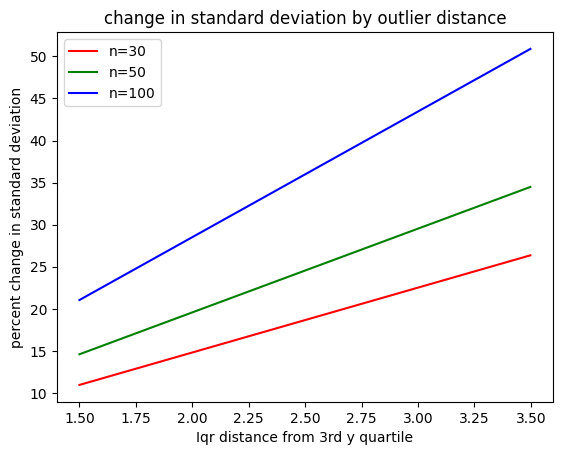

In [11]:
#graph std
b0,b1,std = get_regression_parameters(IqrArr,stdChangeArr)
fig, ax = plt.subplots()

#ax.scatter(IqrArr, stdChangeArr)
ax.plot(IqrArr, b0.item() + b1.item()*IqrArr, color = "red")
b0,b1,std = get_regression_parameters(IqrArr,stdChangeArr50)
ax.plot(IqrArr, b0.item() + b1.item()*IqrArr, color = "green")
b0,b1,std = get_regression_parameters(IqrArr,stdChangeArr100)
ax.plot(IqrArr, b0.item() + b1.item()*IqrArr, color = "blue")

# Labels and title
ax.set_title("change in standard deviation by outlier distance")
ax.set_xlabel("Iqr distance from 3rd y quartile")
ax.set_ylabel("percent change in standard deviation")
ax.legend(["n=30", "n=50", "n=100"])

# Conclusion

### Change in β1

*   Smaller datasets *more* affected by outlier

### Change in β0

*   Smaller datasets *less* affected by outlier
*   Outlier has less effect on mean of Y as sample size increases

### Change in σ^2

*   Smaller datasets *less* affected by outlier
*   Inclusion of outliers in upper quartiles increases
